4.1  "Create 3 clusters as below.



In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Sumit98788p/Capstone-Data/main/District%20wise%20all%20the%20data.csv")
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes in Districts,Unnamed: 30,Unnamed: 31
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,50,46,30,...,16,149,34,175,181,1518,4154,8602,NaN,NaN
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,23,53,30,...,7,118,24,154,270,754,4125,8684,NaN,NaN
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,27,59,34,...,14,112,83,186,404,1262,5818,12436,NaN,NaN
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,20,25,20,...,17,126,38,57,233,1181,3140,6496,NaN,NaN
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,23,49,26,...,12,109,58,247,431,2313,6507,14104,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,1,6,10,NaN,NaN
8605,DELHI UT,WEST,2012,52,37,10,79,79,454,256,...,18,53,6,327,292,1144,5558,13995,NaN,NaN
8606,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0,1,0,1,0,32,60,127,NaN,NaN
8607,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,6,2,2,...,0,2,0,1,44,392,787,1661,NaN,NaN


In [3]:
df.columns.tolist()

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'ATTEMPT TO MURDER',
 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
 'RAPE',
 'OTHER RAPE',
 'KIDNAPPING & ABDUCTION',
 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
 'KIDNAPPING AND ABDUCTION OF OTHERS',
 'DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'AUTO THEFT',
 'OTHER THEFT',
 'RIOTS',
 'CRIMINAL BREACH OF TRUST',
 'CHEATING',
 'ARSON',
 'HURT/GREVIOUS HURT',
 'DOWRY DEATHS',
 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
 'INSULT TO MODESTY OF WOMEN',
 'CRUELTY BY HUSBAND OR HIS RELATIVES',
 'CAUSING DEATH BY NEGLIGENCE',
 'OTHER IPC CRIMES',
 'TOTAL IPC CRIMES',
 'Total Crimes in Districts',
 'Unnamed: 30',
 'Unnamed: 31']

In [4]:
df=df.drop(['Unnamed: 30','Unnamed: 31'],axis=1)
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes in Districts
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,50,46,30,...,30,1131,16,149,34,175,181,1518,4154,8602
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,23,53,30,...,69,1543,7,118,24,154,270,754,4125,8684
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,27,59,34,...,38,2088,14,112,83,186,404,1262,5818,12436
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,20,25,20,...,23,795,17,126,38,57,233,1181,3140,6496
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,23,49,26,...,41,1244,12,109,58,247,431,2313,6507,14104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,10
8605,DELHI UT,WEST,2012,52,37,10,79,79,454,256,...,18,227,18,53,6,327,292,1144,5558,13995
8606,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,32,60,127
8607,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,6,2,2,...,1,186,0,2,0,1,44,392,787,1661


In [5]:
features = [ 'TOTAL IPC CRIMES']
X = df[features]

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Map cluster numbers to cluster labels
cluster_labels = {
    
    0: 'Peaceful Areas',
    1: 'Moderate Areas',
    2: 'Sensitive Areas'
}
df['Area_Category'] = df['Cluster'].map(cluster_labels)




sensitive_areas_df = df[df['Area_Category'] == 'Sensitive Areas']
moderate_areas_df = df[df['Area_Category'] == 'Moderate Areas']
peaceful_areas_df = df[df['Area_Category'] == 'Peaceful Areas']



4.2  Create DataFrame for each cluster that shows data according to the areas.



In [6]:
print("Sensitive Areas DataFrame:")
sensitive_areas_df


Sensitive Areas DataFrame:


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes in Districts,Cluster,Area_Category
244,KARNATAKA,BANGALORE COMMR.,2001,221,327,5,40,40,152,56,...,40,223,51,229,38,11106,27254,60889,2,Sensitive Areas
356,MAHARASHTRA,MUMBAI,2001,295,200,6,127,127,148,12,...,18,274,44,198,709,6095,28968,69525,2,Sensitive Areas
668,DELHI UT,DELHI UT TOTAL,2001,547,510,63,381,381,1627,964,...,113,502,90,138,432,22000,54384,129936,2,Sensitive Areas
927,KARNATAKA,BANGALORE COMMR.,2002,201,311,4,32,32,159,58,...,33,237,62,242,45,11801,29120,65358,2,Sensitive Areas
1039,MAHARASHTRA,MUMBAI,2002,252,134,7,128,128,119,61,...,18,254,40,214,753,5950,26276,62832,2,Sensitive Areas
1352,DELHI UT,DELHI UT TOTAL,2002,531,440,68,403,403,1323,893,...,135,446,128,135,416,20876,49137,116512,2,Sensitive Areas
1616,KARNATAKA,BANGALORE COMMR.,2003,216,280,1,34,34,132,11,...,34,213,39,213,84,12547,29260,65676,2,Sensitive Areas
1734,MAHARASHTRA,MUMBAI,2003,242,115,8,133,133,150,85,...,8,282,44,199,632,5865,25686,61322,2,Sensitive Areas
2047,DELHI UT,DELHI UT TOTAL,2003,485,407,65,490,490,1156,797,...,130,489,105,1211,402,20045,47404,111848,2,Sensitive Areas
2310,KARNATAKA,BANGALORE COMMR.,2004,214,285,2,32,32,175,61,...,44,151,35,227,104,11008,28526,65405,2,Sensitive Areas


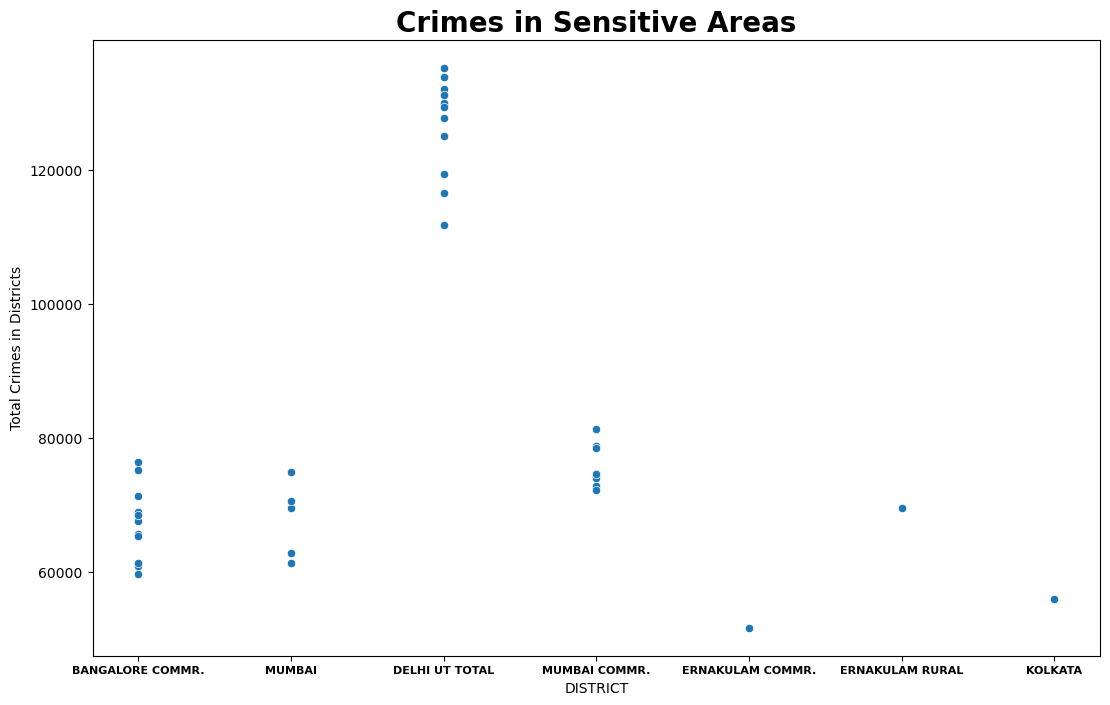

In [7]:
plt.figure(figsize=(13,8),facecolor='white')
sns.scatterplot(x='DISTRICT',y='Total Crimes in Districts',data = sensitive_areas_df )
plt.title('Crimes in Sensitive Areas',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=8,fontweight ='bold',rotation=0)
plt.show()

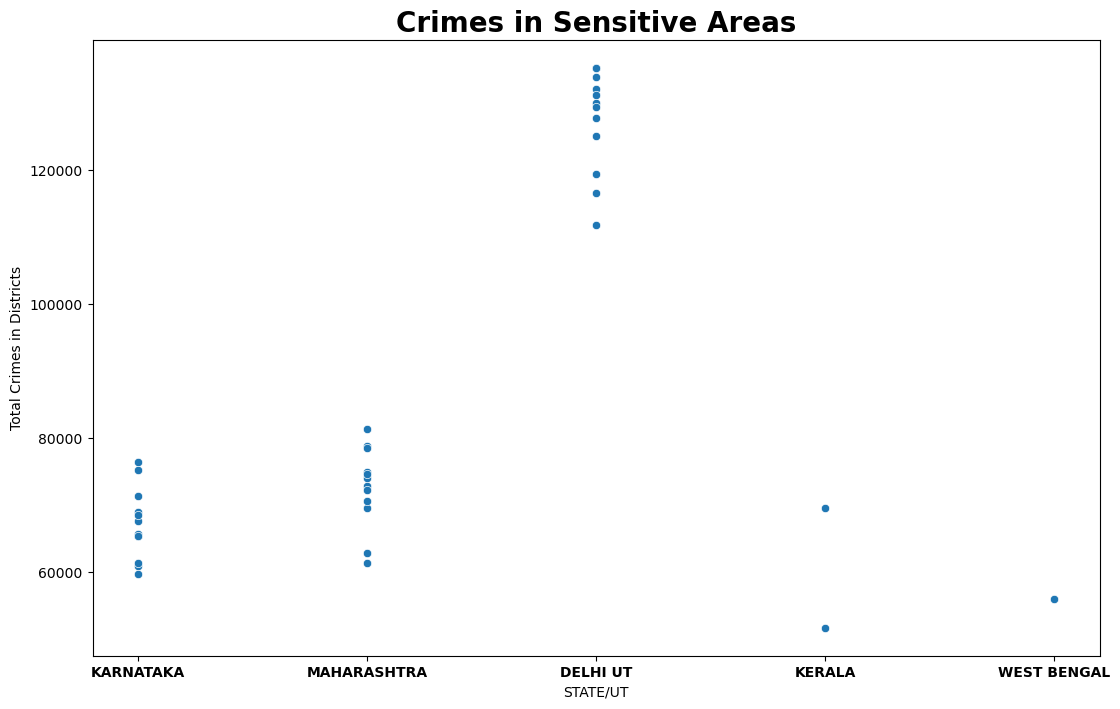

In [8]:
plt.figure(figsize=(13,8),facecolor='white')
sns.scatterplot(x='STATE/UT',y='Total Crimes in Districts',data = sensitive_areas_df )
plt.title('Crimes in Sensitive Areas',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=0)
plt.show()

In [9]:
print("\nModerate Areas DataFrame:")
moderate_areas_df



Moderate Areas DataFrame:


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes in Districts,Cluster,Area_Category
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,27,59,34,...,14,112,83,186,404,1262,5818,12436,1,Moderate Areas
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,23,49,26,...,12,109,58,247,431,2313,6507,14104,1,Moderate Areas
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,54,82,51,...,7,139,129,378,369,2426,7848,16943,1,Moderate Areas
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,37,80,39,...,24,118,27,746,409,1512,11831,26547,1,Moderate Areas
8,ANDHRA PRADESH,KARIMNAGAR,2001,162,85,6,56,56,67,49,...,62,414,81,224,322,1726,5811,12131,1,Moderate Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8599,DELHI UT,NORTH-WEST,2012,60,37,8,64,64,357,184,...,12,19,14,212,9,1253,4542,11403,1,Moderate Areas
8600,DELHI UT,OUTER,2012,96,60,15,67,67,572,317,...,15,79,18,244,90,2006,6344,15538,1,Moderate Areas
8601,DELHI UT,SOUTH,2012,39,19,3,70,70,245,134,...,17,59,36,68,25,1651,5045,12530,1,Moderate Areas
8602,DELHI UT,SOUTH-EAST,2012,46,69,6,116,116,538,306,...,11,160,43,123,218,2004,7040,17614,1,Moderate Areas


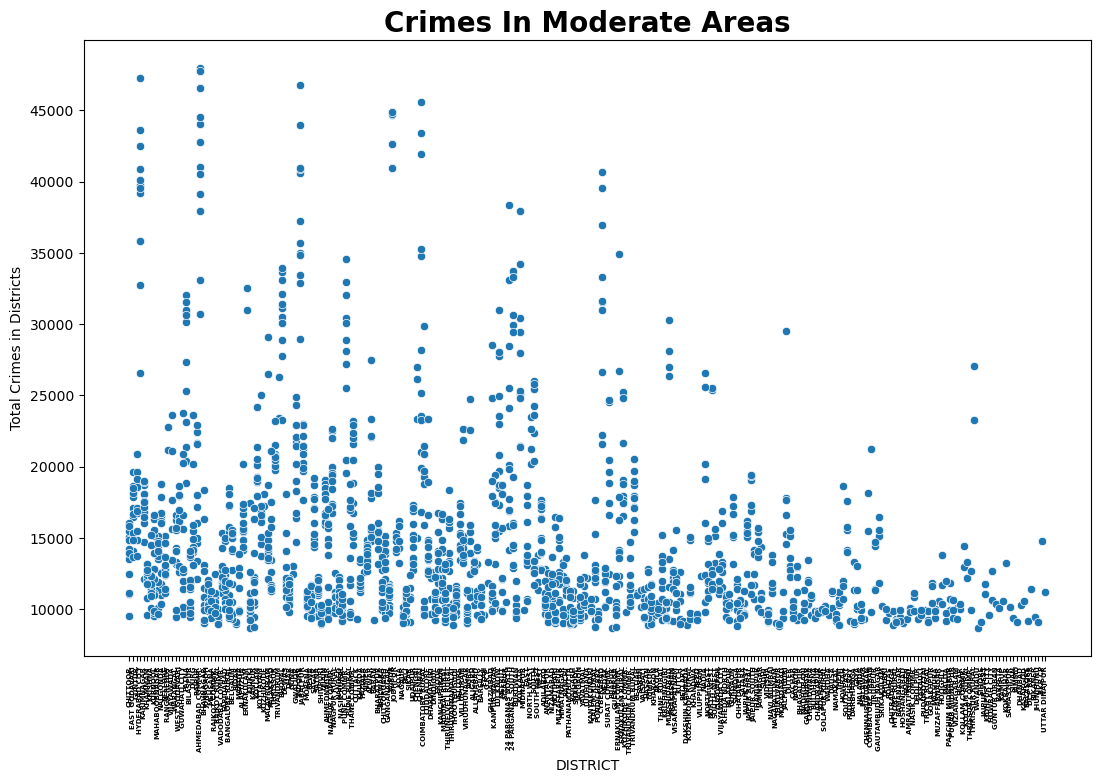

In [10]:
plt.figure(figsize=(13,8),facecolor='white')
sns.scatterplot(x='DISTRICT',y='Total Crimes in Districts',data =moderate_areas_df )
plt.title('Crimes In Moderate Areas',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=5,fontweight ='bold',rotation=90)
plt.show()

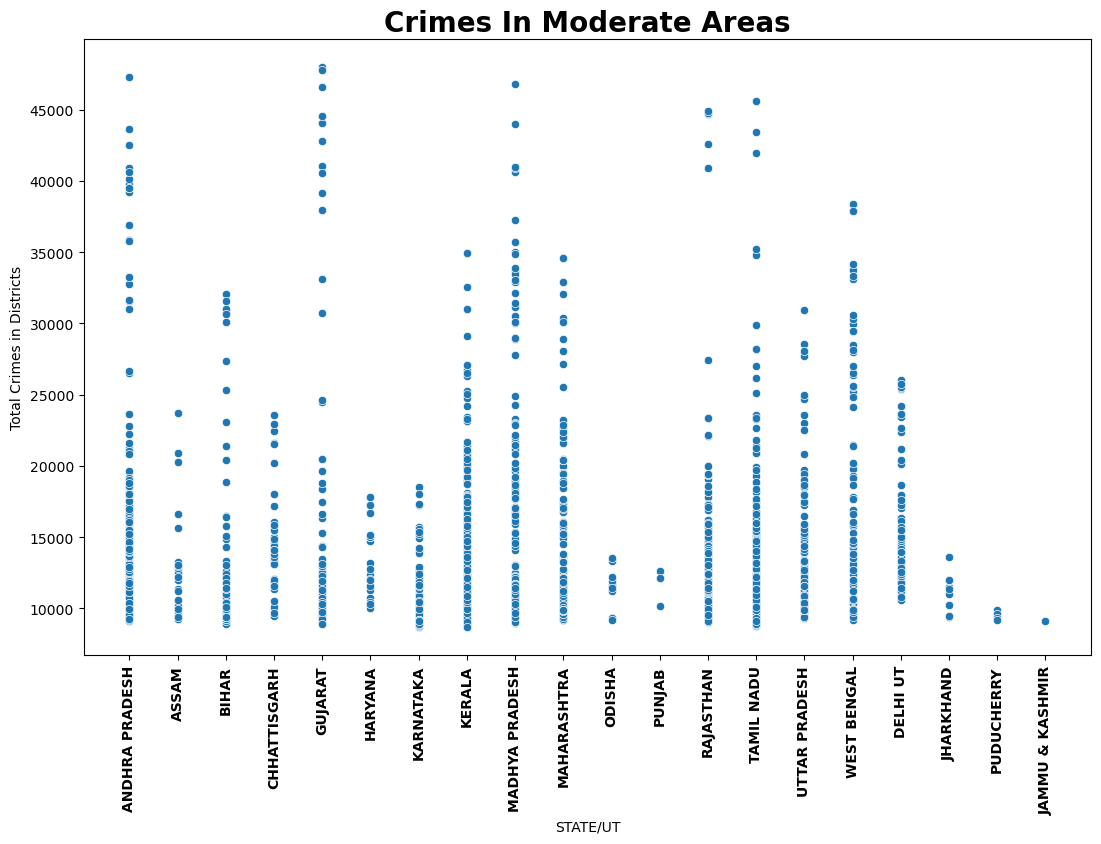

In [11]:
plt.figure(figsize=(13,8),facecolor='white')
sns.scatterplot(x='STATE/UT',y='Total Crimes in Districts',data =moderate_areas_df )
plt.title('Crimes In Moderate Areas',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
plt.show()

In [12]:
print("\nPeaceful Areas DataFrame:")
peaceful_areas_df


Peaceful Areas DataFrame:


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes in Districts,Cluster,Area_Category
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,50,46,30,...,16,149,34,175,181,1518,4154,8602,0,Peaceful Areas
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,23,53,30,...,7,118,24,154,270,754,4125,8684,0,Peaceful Areas
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,20,25,20,...,17,126,38,57,233,1181,3140,6496,0,Peaceful Areas
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,...,0,1,0,0,4,104,287,733,0,Peaceful Areas
13,ANDHRA PRADESH,MEDAK,2001,101,56,12,35,35,26,20,...,26,100,25,192,335,454,3532,7407,0,Peaceful Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8603,DELHI UT,SOUTH-WEST,2012,47,48,6,87,87,399,244,...,18,69,21,207,4,1387,4085,9823,0,Peaceful Areas
8604,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,1,6,10,0,Peaceful Areas
8606,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0,1,0,1,0,32,60,127,0,Peaceful Areas
8607,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,6,2,2,...,0,2,0,1,44,392,787,1661,0,Peaceful Areas


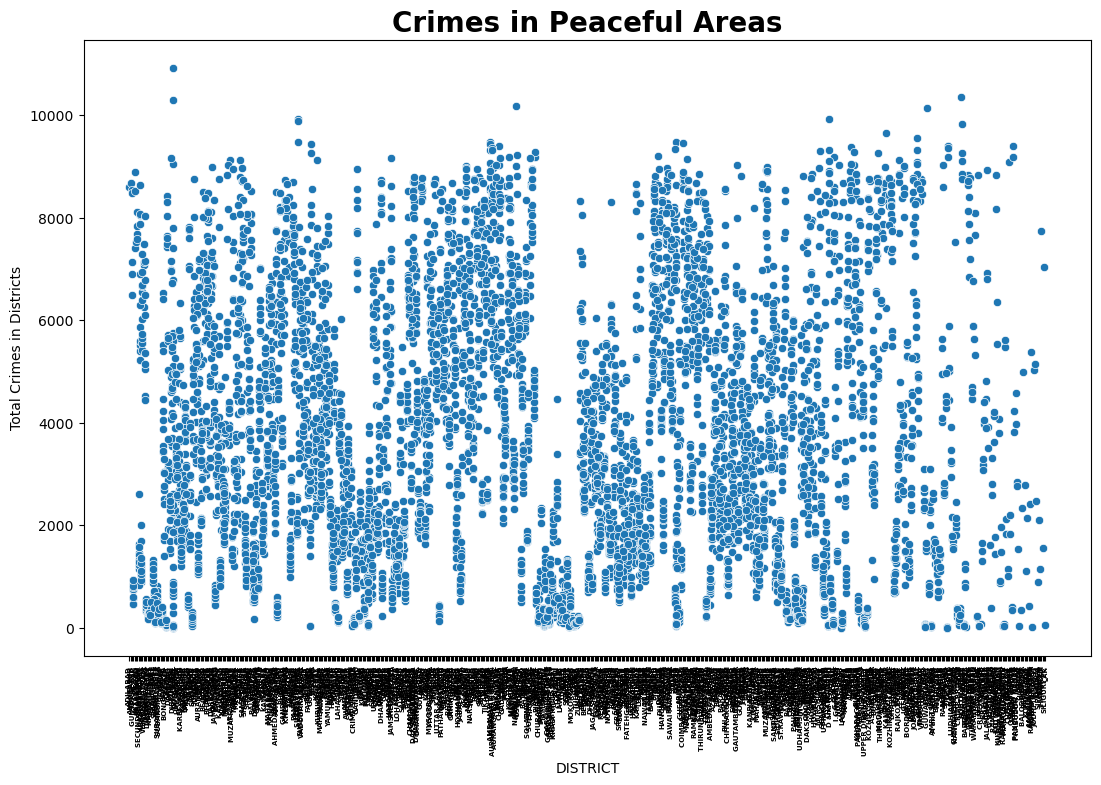

In [13]:
plt.figure(figsize=(13,8),facecolor='white')
sns.scatterplot(x='DISTRICT',y='Total Crimes in Districts',data =peaceful_areas_df )
plt.title('Crimes in Peaceful Areas',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=5,fontweight ='bold',rotation=90)
plt.show()

In [14]:
print(peaceful_areas_df['DISTRICT'])

0            ADILABAD
1           ANANTAPUR
3            CUDDAPAH
5       GUNTAKAL RLY.
13              MEDAK
            ...      
8603       SOUTH-WEST
8604              STF
8606      LAKSHADWEEP
8607         KARAIKAL
8608       PUDUCHERRY
Name: DISTRICT, Length: 6842, dtype: object


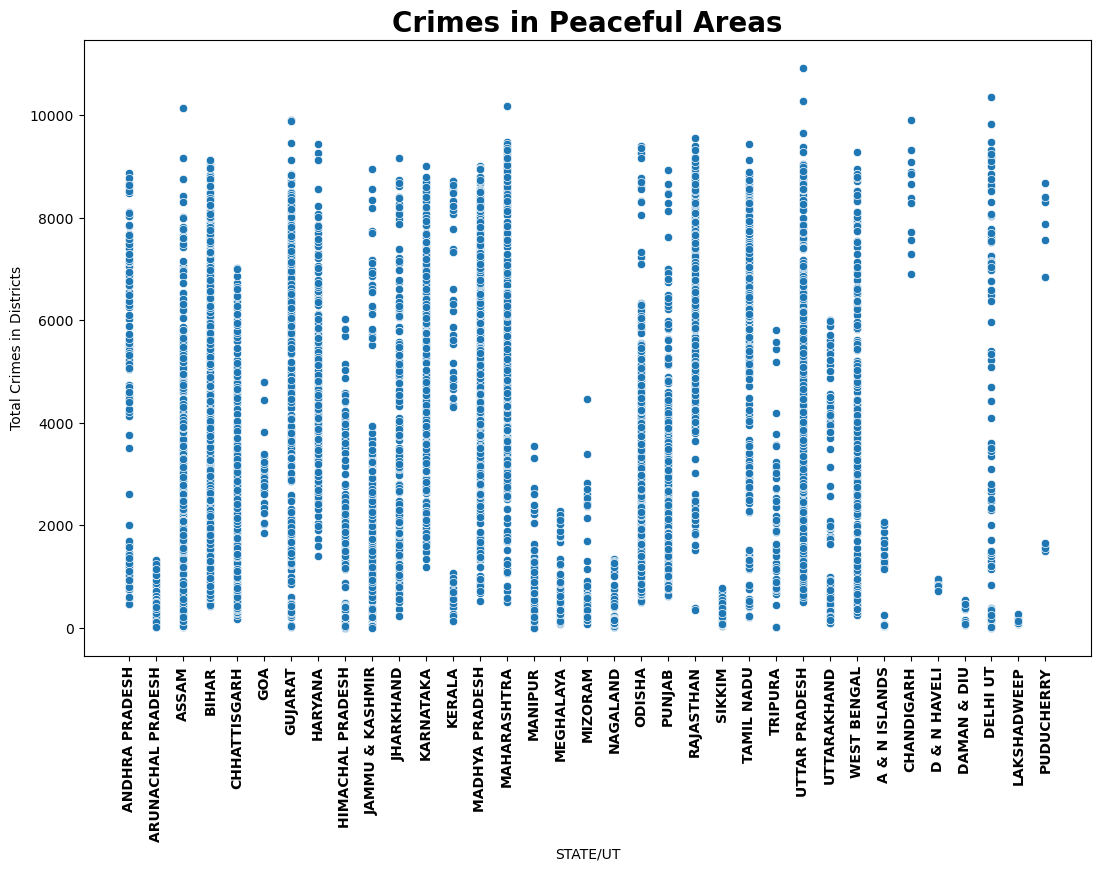

In [15]:
plt.figure(figsize=(13,8),facecolor='white')
sns.scatterplot(x='STATE/UT',y='Total Crimes in Districts',data =peaceful_areas_df )
plt.title('Crimes in Peaceful Areas',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
plt.show()

4.3  "Analyse your clusters and prepare a report that explains all your observations.







Example - 







1. What is impacting more crimes in sensitive areas. 







2. What needs to be done to reduce crime. 







3. Most safe and unsafe districts.







4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"





Report of the Observations :----

According to the observation in the sensitive areas like Delhi, Maharashtra and Karnataka etc. states there area some areas(Districts) which area more sensitive areas as compared to other states or districts according to all the observations the Population and the Area of the state are impacting the crimes in the sensitive areas we can see that things where have less area in the state there is very high population and the literacy rate is also affecting the crimes in these states. 
In the Sensitive areas we can see that the highest crimes are in the delhi and mumbai commr.in the mumbai the population is high and in the delhi also the population high so the population is affecting the literacy rate and literacy rate is affecting the crimes in the sensitive areas 

From All the above Observations when the Literacy rate will not affect the population the crimes will go down in other words when the literacy rate is increase and the population will decrease the crime rate will also be decrease 

In the above Sensitive areas we can see this the most unsafe district is Delhi Ut Total and the most safest District is also in the Delhi called the S.T.F (Special Task Force ) there is no tolerance like we can say that there is no crime in S.T.F. district of delhi then comes others districts like Railways Katra in Jammu and Kashmir,CID District in Himanchal Pradesh or Sant Kabir Nagar district in Uttar pradesh and  much more districts are having very low crime rate as compared to the Moderate Areas or sensitive areas 

I observed that the  most of the district in india have very less crime rate in the time period of 2001 to 2012 around 85% of districts have very less
crime rate so these area compareed as the peaceful areas on the other hand if we talk about moderate areas 12-13% of the districts have moderate crimes
means not very less and not very large means on there is an average crimes in the districts 
and in the sensitive areas 2-3% of the districts have very large number of crimes in the districts  

In the last the conclusion is when the population is decrease in the small areas state then the crime rate will also decrease in the distrricts and the literacy rate will increase 

4.4   Capstone project overall story in your own words. Min 1000 words.



Introduction:

In a diverse and populous country like India, crime is a multifaceted issue that affects individuals, communities, and society as a whole. The "Crimes in India" capstone project aims to delve into the intricate landscape of criminal activities across the nation, employing data-driven approaches to uncover patterns, trends, and insights that can inform policy decisions, law enforcement strategies, and community interventions. Through meticulous analysis of crime data spanning various dimensions such as type, location, demographic factors, and socio-economic indicators, this project endeavors to shed light on the complex dynamics of crime in India and propose evidence-based solutions to address the underlying challenges.


Understanding the Scope of Crime:

The journey begins by providing an overview of the diverse range of criminal activities prevalent in India. From violent crimes like murder and kidnapping crimes such as theft and burglary, the project aims to categorize and analyze different types of offenses. By examining crime statistics over time and across different regions, the chapter sets the stage for a deeper exploration into the underlying factors driving crime rates and patterns.




Mapping Crime Hotspots:

Geographical analysis plays a pivotal role in understanding the spatial distribution of crime across India. Leveraging geographic information systems (GIS) and mapping techniques, the project maps out crime hotspots, identifies high-risk areas, and visualizes patterns of criminal activity. By overlaying crime data with demographic and socio-economic variables, stakeholders gain valuable insights into the factors contributing to localized crime rates and can tailor interventions accordingly.


Socio-Economic Determinants of Crime:


Socio-economic disparities often play a crucial role in shaping crime patterns and dynamics. This chapter explores the impact of poverty, inequality, urbanization, and access to basic services on crime rates in India. By analyzing economic indicators, employment trends, and social welfare programs, the project aims to uncover correlations between socio-economic factors and crime rates. Through evidence-based policy recommendations, the chapter seeks to address underlying socio-economic inequalities and reduce the risk of criminality in vulnerable communities.


Forecasting Future Crime Trends:


Predictive modeling techniques are employed to forecast future crime trends in India, leveraging historical crime data and socio-economic indicators. By developing predictive models that anticipate changes in crime rates over time, stakeholders can proactively allocate resources, implement preventive measures, and mitigate potential risks associated with emerging crime patterns. The chapter emphasizes the importance of data-driven decision-making in developing effective crime prevention strategies.


Conclusion:



The "Crimes in India" capstone project represents a concerted effort to analyze and understand the complexities of crime in one of the world's most populous nations. By harnessing the power of data analytics, geographical mapping, demographic profiling, and socio-economic analysis, the project aims to provide actionable insights to policymakers, law enforcement agencies, and community stakeholders. Through collaborative efforts and evidence-based interventions, India can strive towards creating safer and more secure communities, fostering social cohesion, and promoting the well-being of all its citizens.